In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [96]:
df = pd.read_excel('Data.xlsx')
df = df.fillna(0)

In [97]:
df

,Country,Age,Salary,Purchased,Gender,EstimatedSalary
0,France,44.0,72000.0,No,M,72000.0
1,Spain,27.0,48000.0,Yes,M,48000.0
2,Germany,30.0,54000.0,No,F,54000.0
3,Spain,38.0,61000.0,No,M,61000.0
4,Germany,40.0,0.0,Yes,F,0.0
5,France,35.0,58000.0,Yes,F,58000.0
6,Spain,0.0,52000.0,No,F,52000.0
7,France,48.0,79000.0,Yes,M,79000.0
8,Germany,50.0,83000.0,No,M,83000.0
9,France,37.0,67000.0,Yes,M,67000.0


In [98]:
df.Age = df.Age.astype(float).astype(int)
df.Salary = df.Salary.astype(float).astype(int)
df.EstimatedSalary = df.EstimatedSalary.astype(float).astype(int)

In [99]:
df

,Country,Age,Salary,Purchased,Gender,EstimatedSalary
0,France,44,72000,No,M,72000
1,Spain,27,48000,Yes,M,48000
2,Germany,30,54000,No,F,54000
3,Spain,38,61000,No,M,61000
4,Germany,40,0,Yes,F,0
5,France,35,58000,Yes,F,58000
6,Spain,0,52000,No,F,52000
7,France,48,79000,Yes,M,79000
8,Germany,50,83000,No,M,83000
9,France,37,67000,Yes,M,67000


In [100]:
print(df.shape)

(10, 6)


### One-Hot-Encode

In [101]:
df2 = pd.get_dummies(df)

In [102]:
df2

,Age,Salary,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes,Gender_F,Gender_M
0,44,72000,72000,1,0,0,1,0,0,1
1,27,48000,48000,0,0,1,0,1,0,1
2,30,54000,54000,0,1,0,1,0,1,0
3,38,61000,61000,0,0,1,1,0,0,1
4,40,0,0,0,1,0,0,1,1,0
5,35,58000,58000,1,0,0,0,1,1,0
6,0,52000,52000,0,0,1,1,0,1,0
7,48,79000,79000,1,0,0,0,1,0,1
8,50,83000,83000,0,1,0,1,0,0,1
9,37,67000,67000,1,0,0,0,1,0,1


### STANDARDIZING : Beacuse giving equal value to every variable. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed

In [103]:
X = StandardScaler().fit_transform(df2)

In [104]:
X

array([[ 0.67326185,  0.66196986,  0.66196986,  1.22474487, -0.65465367,
        -0.65465367,  1.        , -1.        , -0.81649658,  0.81649658],
       [-0.58448007, -0.42619977, -0.42619977, -0.81649658, -0.65465367,
         1.52752523, -1.        ,  1.        , -0.81649658,  0.81649658],
       [-0.36252561, -0.15415736, -0.15415736, -0.81649658,  1.52752523,
        -0.65465367,  1.        , -1.        ,  1.22474487, -1.22474487],
       [ 0.22935294,  0.16322544,  0.16322544, -0.81649658, -0.65465367,
         1.52752523,  1.        , -1.        , -0.81649658,  0.81649658],
       [ 0.37732257, -2.60253904, -2.60253904, -0.81649658,  1.52752523,
        -0.65465367, -1.        ,  1.        ,  1.22474487, -1.22474487],
       [ 0.00739848,  0.02720424,  0.02720424,  1.22474487, -0.65465367,
        -0.65465367, -1.        ,  1.        ,  1.22474487, -1.22474487],
       [-2.58207016, -0.24483817, -0.24483817, -0.81649658, -0.65465367,
         1.52752523,  1.        , -1.        

### K-Means Clustering

In [115]:
kmeans = KMeans(n_clusters=3) 
kmeans1 = kmeans.fit_predict(X)

In [116]:
kmeans1

array([2, 1, 0, 1, 0, 0, 1, 2, 2, 2])

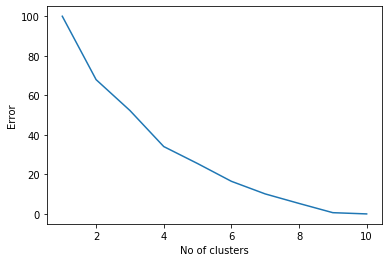

In [117]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

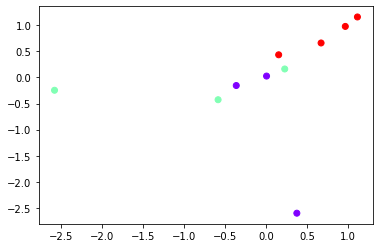

In [120]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans1, cmap='rainbow')